<a href="https://colab.research.google.com/github/jelandrum/DATA_410/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a new Github page with a presentation on the concepts of Locally Weighted Regression and Random Forest. 

Apply the regression methods to real data sets, such as "Cars" or "Boston Housing Data" where you consider only one input variable (the weight of the car for the "Cars" data set and the number of rooms for the "Boston Hausing" data). The output varable is the mileage for the "Cars" data set and "cmedv" or the median price for the housing data.

For each method and data set report the crossvalidated mean square error and determine which method is achieveng the better results.

In this paper you should also include theoretical considerations, examples of Python coding and plots. 

The final results should be clearly stated.

In [2]:
!pip install --upgrade scipy

     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
# import libraries
import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, griddata
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

In [4]:
# Tricubic Kernel
def tricubic(x):
  if len(x.shape) == 1:
    x = x.reshape(-1,1)
  d = np.sqrt(np.sum(x**2,axis=1))
  return np.where(d>1,0,70/81*(1-d**3)**3)

In [5]:
def lowess_reg(x, y, xnew, kern, tau):
    # tau is called bandwidth K((x-x[i])/(2*tau))
    # IMPORTANT: we expect x to the sorted increasingly
    n = len(x)
    yest = np.zeros(n)

    #Initializing all weights from the bell shape kernel function    
    w = np.array([kern((x - x[i])/(2*tau)) for i in range(n)])     
    
    #Looping through all x-points
    for i in range(n):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        #theta = linalg.solve(A, b) # A*theta = b
        theta, res, rnk, s = linalg.lstsq(A, b)
        yest[i] = theta[0] + theta[1] * x[i] 
    f = interp1d(x, yest,fill_value='extrapolate')
    return f(xnew)

In [6]:
cars = pd.read_csv('drive/My Drive/Colab Notebooks/DATA 410/cars.csv')

In [7]:
cars

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449
...,...,...,...,...
387,27.0,4,140.0,2790
388,44.0,4,97.0,2130
389,32.0,4,135.0,2295
390,28.0,4,120.0,2625


In [8]:
x = cars['WGT'].values
y = cars['MPG'].values

In [9]:
# we want to split the data into a train/test set and we want to standardize correctly
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.25, random_state=123)

In [10]:
# standardize the input features
scale = StandardScaler()
xtrain_scaled = scale.fit_transform(xtrain.reshape(-1,1))
xtest_scaled = scale.transform(xtest.reshape(-1,1))

In [11]:
xtrain_scaled

array([[-6.36896510e-02],
       [ 1.03804274e+00],
       [ 9.45351728e-01],
       [ 9.08979306e-01],
       [-1.15838222e+00],
       [-1.17363517e+00],
       [-8.11084254e-01],
       [ 5.45255088e-01],
       [-6.16315802e-01],
       [ 2.75395184e-01],
       [-2.52591584e-01],
       [-1.64593789e-01],
       [-1.09150389e+00],
       [ 2.08814975e+00],
       [ 1.28912978e+00],
       [-8.83829097e-01],
       [ 4.07343986e-02],
       [-3.06563564e-01],
       [-1.19475464e+00],
       [ 1.81125003e+00],
       [ 1.62586801e+00],
       [-1.06099799e+00],
       [-5.34184527e-01],
       [-1.31443164e+00],
       [-9.68306980e-01],
       [-8.99082048e-01],
       [-7.10180116e-01],
       [-2.34992025e-01],
       [-6.62074655e-01],
       [ 1.52198272e-01],
       [ 5.98053765e-01],
       [ 1.09905454e+00],
       [ 2.34158340e+00],
       [-9.20201519e-01],
       [-1.16190213e+00],
       [ 4.06805224e-01],
       [-5.91676419e-01],
       [ 1.31611577e+00],
       [-1.5

In [12]:
# we want to see some results coming up 
# we want to guess some value for our tau hyper-parameter
yhat_test = lowess_reg(xtrain_scaled.ravel(),ytrain,xtest_scaled,tricubic,0.1)

In [13]:
yhat_test

array([[14.56945683],
       [32.25992704],
       [14.6551352 ],
       [26.2227541 ],
       [26.48007223],
       [18.45163738],
       [28.1230699 ],
       [18.09950144],
       [14.47642771],
       [32.98941447],
       [14.73297316],
       [20.33086657],
       [16.88484969],
       [32.22031529],
       [14.59545205],
       [22.22919301],
       [28.1230699 ],
       [12.2393617 ],
       [14.45476736],
       [17.56495876],
       [21.28462059],
       [29.26138687],
       [26.50950836],
       [34.44727511],
       [32.51473368],
       [17.03198353],
       [26.56845344],
       [31.10141831],
       [22.82650728],
       [33.31937123],
       [18.43319231],
       [26.55861712],
       [19.97297011],
       [22.94128649],
       [21.67592586],
       [25.12133525],
       [31.50643118],
       [23.52402131],
       [26.34044452],
       [14.07749026],
       [16.76737658],
       [19.0635408 ],
       [26.68781478],
       [18.05726193],
       [26.25968215],
       [20

In [14]:
# get the mse
mse(yhat_test,ytest)

15.961885966790932

In [15]:
# implement Random Forest
rf = RandomForestRegressor(n_estimators=100,max_depth=3)

In [16]:
rf.fit(xtrain_scaled,ytrain)

RandomForestRegressor(max_depth=3)

In [17]:
mse(ytest,rf.predict(xtest_scaled))

15.848987476999069

In [18]:
# calculate yhat for Locally Weighted Linear Regression
yhat_test = lowess_reg(xtrain_scaled.ravel(),ytrain,xtest_scaled.ravel(),tricubic,0.1)

In [19]:
yhat_test

array([14.56945683, 32.25992704, 14.6551352 , 26.2227541 , 26.48007223,
       18.45163738, 28.1230699 , 18.09950144, 14.47642771, 32.98941447,
       14.73297316, 20.33086657, 16.88484969, 32.22031529, 14.59545205,
       22.22919301, 28.1230699 , 12.2393617 , 14.45476736, 17.56495876,
       21.28462059, 29.26138687, 26.50950836, 34.44727511, 32.51473368,
       17.03198353, 26.56845344, 31.10141831, 22.82650728, 33.31937123,
       18.43319231, 26.55861712, 19.97297011, 22.94128649, 21.67592586,
       25.12133525, 31.50643118, 23.52402131, 26.34044452, 14.07749026,
       16.76737658, 19.0635408 , 26.68781478, 18.05726193, 26.25968215,
       20.53349753, 24.81647784, 26.41847358, 26.76813087, 20.10040201,
       25.90490728, 32.4056665 , 14.36949747, 18.47931441, 18.48681187,
       14.05983242, 11.79893896, 29.26138687, 23.15778084, 32.59590458,
       14.74308091, 12.01595745, 29.12923115, 24.36166768, 16.99011113,
       33.08876952, 30.96537612, 22.54695833, 23.18916691, 21.72

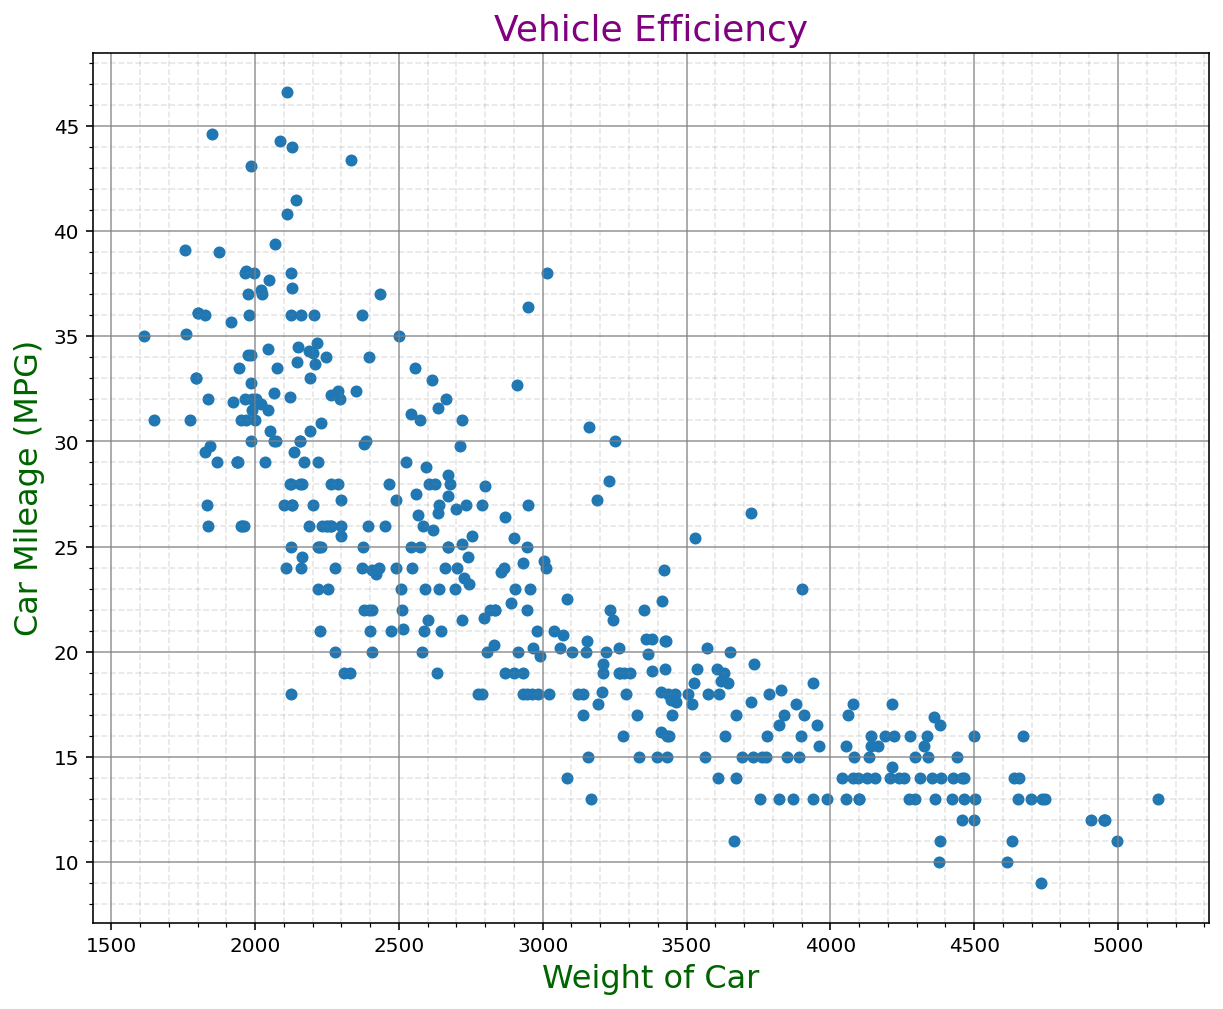

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=cars['WGT'], y=cars['MPG'],s=25)
ax.set_xlabel('Weight of Car',fontsize=16,color='darkgreen')
ax.set_ylabel('Car Mileage (MPG)',fontsize=16,color='darkgreen')
ax.set_title('Vehicle Efficiency',fontsize=18,color='purple')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

In [21]:
# KFold
kf = KFold(n_splits=10,shuffle=True,random_state=123)
mse_lwr = []
mse_rf = []

In [22]:
mse_lwr = []
mse_rf = []
rf = RandomForestRegressor(n_estimators=150,max_depth=3)
kf = KFold(n_splits=10,shuffle=True,random_state=1234)
for idxtrain,idxtest in kf.split(x):
  ytrain = y[idxtrain]
  xtrain = x[idxtrain]
  xtrain = scale.fit_transform(xtrain.reshape(-1,1))
  ytest = y[idxtest]
  xtest = x[idxtest]
  xtest = scale.transform(xtest.reshape(-1,1))
  yhat_lwr = lowess_reg(xtrain.ravel(),ytrain,xtest.ravel(),tricubic,0.4)
  rf.fit(xtrain,ytrain)
  yhat_rf = rf.predict(xtest)
  mse_lwr.append(mse(ytest,yhat_lwr))
  mse_rf.append(mse(ytest,yhat_rf))
print('The MSE for Random Forest is :' + str(np.mean(mse_rf)))
print('The MSE for Locally Weighted Regression is :' + str(np.mean(mse_lwr)))

The MSE for Random Forest is :17.637712802092114
The MSE for Locally Weighted Regression is :17.509317956140727


Ordinary Least Squares Regression (Linear Regression)
This in an analysis of a real data set that was extracted from the 1974 *Motor Trend US* magazine and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973-1974 models).

In [23]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, QuantileTransformer

In [24]:
scaler = StandardScaler()
scaler.fit(cars[['WGT']])

StandardScaler()

In [25]:
scaler.fit_transform(cars[['WGT']])

array([[ 6.20540339e-01],
       [ 8.43334032e-01],
       [ 5.40381761e-01],
       [ 5.36845353e-01],
       [ 5.55706195e-01],
       [ 1.60719812e+00],
       [ 1.62252256e+00],
       [ 1.57301285e+00],
       [ 1.70621754e+00],
       [ 1.02840604e+00],
       [ 6.90089693e-01],
       [ 7.44314613e-01],
       [ 9.23492610e-01],
       [ 1.27800847e-01],
       [-7.13864217e-01],
       [-1.70436213e-01],
       [-2.39985567e-01],
       [-4.60421656e-01],
       [-9.99134449e-01],
       [-1.34688122e+00],
       [-3.60223434e-01],
       [-6.45493666e-01],
       [-7.10327809e-01],
       [-8.76538977e-01],
       [-3.88514696e-01],
       [ 1.93019004e+00],
       [ 1.64845622e+00],
       [ 1.65552903e+00],
       [ 2.06810995e+00],
       [-9.99134449e-01],
       [-8.41174899e-01],
       [-8.83611793e-01],
       [-4.05017933e-01],
       [ 5.43918169e-01],
       [ 4.14249882e-01],
       [ 3.82422211e-01],
       [ 3.65918975e-01],
       [ 1.45159618e+00],
       [ 1.7

In [26]:
qtn = QuantileTransformer(n_quantiles=100)

In [27]:
qtn.fit_transform(cars[['WGT']])*100

array([[ 72.4652021 ],
       [ 77.16375372],
       [ 70.79360414],
       [ 70.55718475],
       [ 71.49403518],
       [ 91.51467468],
       [ 91.85561357],
       [ 90.76660017],
       [ 93.84538247],
       [ 80.81677359],
       [ 73.68632765],
       [ 74.72382005],
       [ 78.76098012],
       [ 59.5888368 ],
       [ 31.41654202],
       [ 50.80107194],
       [ 49.04558248],
       [ 40.40634789],
       [ 18.18181818],
       [  3.03563244],
       [ 44.86486486],
       [ 34.78433625],
       [ 31.69076505],
       [ 25.6144361 ],
       [ 43.71837948],
       [ 96.66225097],
       [ 92.73349132],
       [ 92.95603397],
       [ 97.9758661 ],
       [ 18.18181818],
       [ 27.23880597],
       [ 25.28165739],
       [ 42.58349923],
       [ 70.95524208],
       [ 66.57738665],
       [ 66.06083796],
       [ 65.7929979 ],
       [ 88.65324385],
       [ 94.94949495],
       [ 87.24787075],
       [ 85.80036678],
       [ 99.01101251],
       [ 98.0430459 ],
       [100

In [28]:
np.argmax(qtn.fit_transform(cars[['WGT']])*100)

43

In [29]:
v = cars[['WGT']].values
v[np.argmin(qtn.fit_transform(cars[['WGT']])*100)]

array([1613])

In [30]:
x = cars[['WGT']]
y = cars[['MPG']]
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

In [31]:
lm.intercept_

array([46.21652431])

In [32]:
lm.coef_

array([[-0.00764734]])

In [33]:
m = lm.coef_
n = lm.intercept_

print('The slope is:'+str(m))
print('The intercept is:'+str(n))

The slope is:[[-0.00764734]]
The intercept is:[46.21652431]


In [34]:
xb = np.mean(x.values)
yb=np.mean(y.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


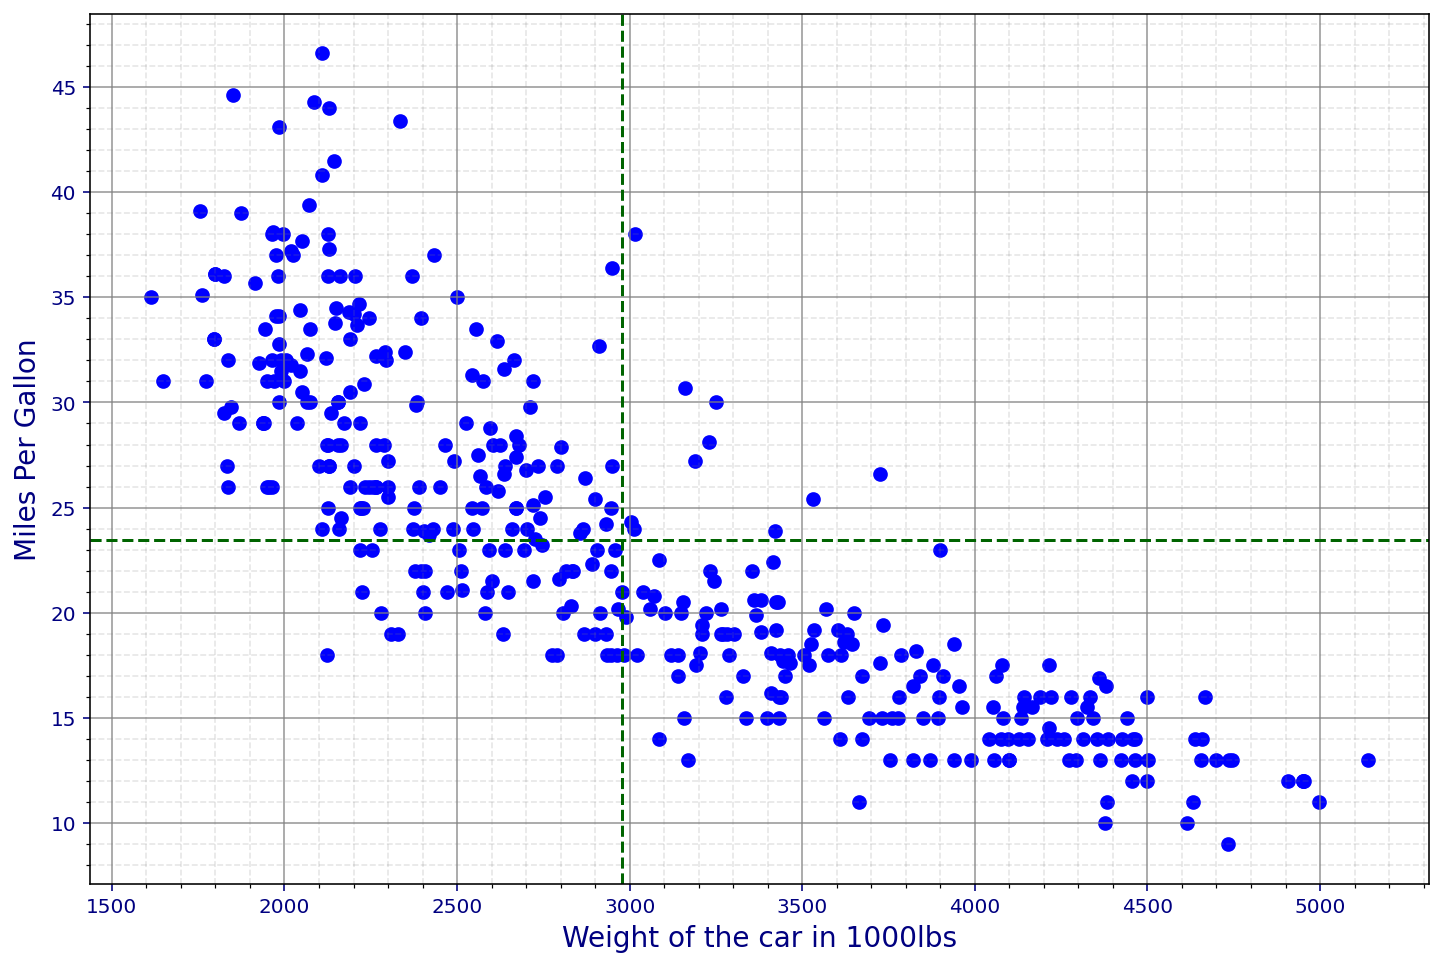

In [35]:
import matplotlib.pyplot as plt
x_range = np.arange(np.max(x.values)+1)
yhat = lm.predict(x_range.reshape(-1,1))
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x,y,color='blue',s=40)
#ax.plot(x_range.reshape(-1,1), yhat, '-',color='red',lw=2.5)
ax.set_xlabel('Weight of the car in 1000lbs',fontsize=14,color='navy')
ax.set_ylabel('Miles Per Gallon',fontsize=14,color='navy')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.axvline(x=xb, color='darkgreen',linestyle='dashed')
plt.axhline(y=yb, color='darkgreen',linestyle='dashed')
plt.tick_params(axis='x', colors='navy')
plt.tick_params(axis='y', colors='navy')
ax.minorticks_on()
plt.show()

In [36]:
np.mean(x)

WGT    2977.584184
dtype: float64

In [40]:
!pip install git+https://github.com/hyperopt/hyperopt-sklearn.git

  Cloning https://github.com/hyperopt/hyperopt-sklearn.git to /tmp/pip-req-build-d0varu16
  Running command git clone -q https://github.com/hyperopt/hyperopt-sklearn.git /tmp/pip-req-build-d0varu16
     |████████████████████████████████| 154 kB 13.8 MB/s 
  Created wheel for hpsklearn: filename=hpsklearn-0.0.3-py3-none-any.whl size=27011 sha256=df68fb0448cd77f459a071d0fd6c66979f7d19efb35700fef43b739bffc1564b
  Stored in directory: /tmp/pip-ephem-wheel-cache-phsdeivr/wheels/47/a5/46/9ca750026db9dfa5de4bf4836194554cb0e2e01a245588ea59
Successfully built hpsklearn


In [42]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

     |████████████████████████████████| 61 kB 831 bytes/s 


In [46]:
from dtreeviz.trees import *
from sklearn.tree import DecisionTreeRegressor
import pydot
from IPython.display import Image

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


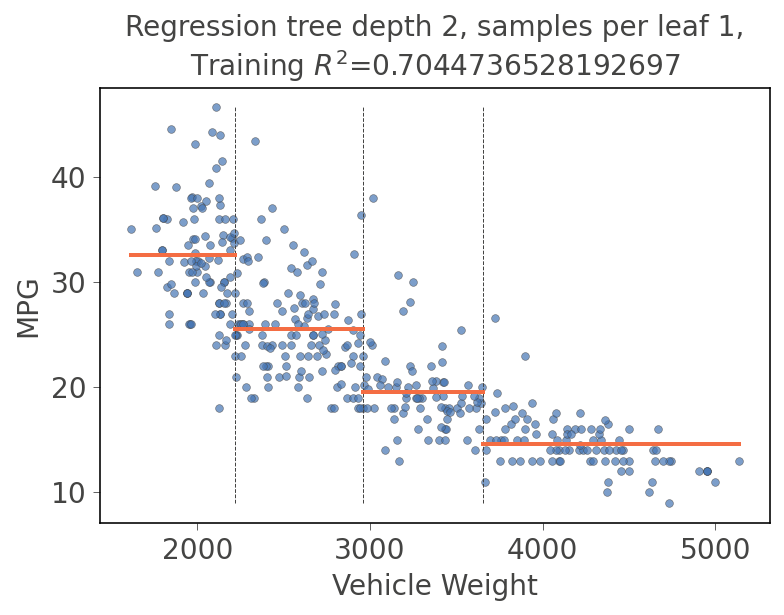

In [51]:
x_train, y_train = cars['WGT'].values, cars['MPG'].values
dtt = DecisionTreeRegressor(max_depth=2, criterion="mae")
dtt.fit(x_train.reshape(-1,1),y_train)
t = rtreeviz_univar(dtt,
                    x_train.reshape(-1,1), y_train,
                    feature_names='Vehicle Weight',
                    target_name='MPG',
                    fontsize=14)
plt.show()

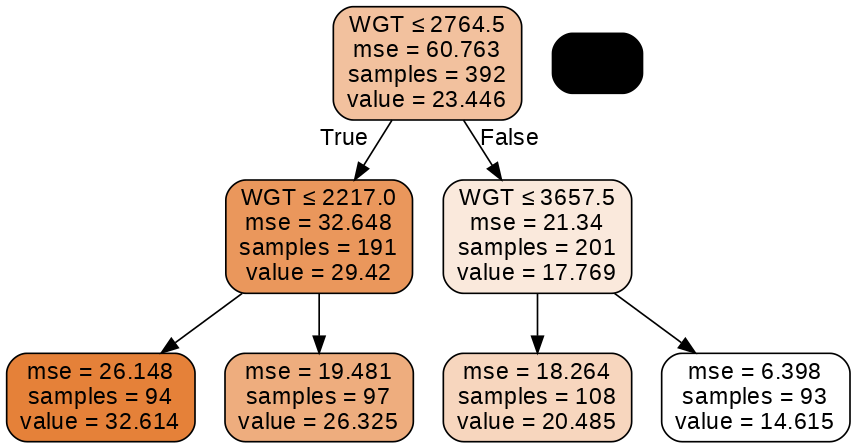

In [50]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
feats = ['WGT']
spc = ['MPG']
def ShowTree(classifier, features, classes):
    dot_data = tree.export_graphviz(dtt, out_file=None, filled=True, rounded=True,
                special_characters=True, feature_names=features, class_names=classes)
    (g,) = pydot.graph_from_dot_data(dot_data)
    g.set_dpi('120')
    g.write_png('tree1.png')
    return Image(g.create_png())

ShowTree(dtt, feats, spc)

In [55]:
# %%shell
# jupyter nbconvert --to html("drive/My Drive/Colab Notebooks/DATA 410/Project_2.ipynb")

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `jupyter nbconvert --to html("drive/My Drive/Colab Notebooks/DATA 410/Project_2.ipynb")'


CalledProcessError: ignored